In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,roc_auc_score,roc_curve
from sklearn.model_selection import cross_val_score,KFold,cross_val_predict,StratifiedKFold,GridSearchCV
from sklearn.neural_network import MLPClassifier
import pickle

In [0]:
def handleMIssingVals(df2):
  df2['ps_ind_02_cat'] = df2['ps_ind_02_cat'].fillna(1.0)
  df2['ps_ind_04_cat']=df2['ps_ind_04_cat'].fillna(0.0)
  df2['ps_ind_05_cat']=df2['ps_ind_05_cat'].fillna(7.0)
  df2['ps_reg_03']=df2['ps_reg_03'].fillna(df2['ps_reg_03'].mean())
  df2['ps_car_01_cat']=df2['ps_car_01_cat'].fillna(11.0)
  df2['ps_car_05_cat']=df2['ps_car_05_cat'].fillna(2.0)
  df2['ps_car_07_cat']=df2['ps_car_07_cat'].fillna(1.0)
  df2['ps_car_09_cat']=df2['ps_car_09_cat'].fillna(2.0)
  df2['ps_car_11']=df2['ps_car_11'].fillna(3.0)
  df2['ps_car_12']=df2['ps_car_12'].fillna(df2['ps_car_12'].mean())
  df2['ps_car_14']=df2['ps_car_14'].fillna(df2['ps_car_14'].mean())

In [0]:
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/auto.csv')
df=df.replace(-1,np.nan)
handleMIssingVals(df)

In [0]:
drop_cols=['id', 'ps_car_13' ,'ps_car_14' , 'ps_reg_03' , 'ps_ind_10_bin' , 'ps_ind_11_bin' , 'ps_ind_13_bin' ,'ps_ind_14' , 'ps_car_03_cat','target']
df.drop(drop_cols,axis=1,inplace=True)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(df,target, test_size= 0.2, random_state=27)

In [0]:
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=1000, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)

In [24]:
clf.fit(x_train,y_train)

Iteration 1, loss = 0.16504640
Iteration 2, loss = 0.15657484
Iteration 3, loss = 0.15599840
Iteration 4, loss = 0.15572189
Iteration 5, loss = 0.15545164
Iteration 6, loss = 0.15536726
Iteration 7, loss = 0.15518174
Iteration 8, loss = 0.15493828
Iteration 9, loss = 0.15485565
Iteration 10, loss = 0.15478602
Iteration 11, loss = 0.15465210
Iteration 12, loss = 0.15461967
Iteration 13, loss = 0.15452151
Iteration 14, loss = 0.15443361
Iteration 15, loss = 0.15434555
Iteration 16, loss = 0.15430441
Iteration 17, loss = 0.15417642
Iteration 18, loss = 0.15424073
Iteration 19, loss = 0.15418434
Iteration 20, loss = 0.15412441
Iteration 21, loss = 0.15401922
Iteration 22, loss = 0.15403687
Iteration 23, loss = 0.15397536
Iteration 24, loss = 0.15390153
Iteration 25, loss = 0.15389963
Iteration 26, loss = 0.15386404
Iteration 27, loss = 0.15383446
Iteration 28, loss = 0.15377199
Iteration 29, loss = 0.15377642
Iteration 30, loss = 0.15372966
Iteration 31, loss = 0.15376469
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=21, shuffle=True, solver='sgd',
              tol=1e-09, validation_fraction=0.1, verbose=10, warm_start=False)

In [0]:
y_pred = clf.predict(x_test)

In [26]:
accuracy_score(y_test,y_pred)

0.9624505430810716

In [27]:
confusion_matrix(y_test, y_pred)

array([[114564,    130],
       [  4340,      9]])

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114694
           1       0.06      0.00      0.00      4349

    accuracy                           0.96    119043
   macro avg       0.51      0.50      0.49    119043
weighted avg       0.93      0.96      0.95    119043



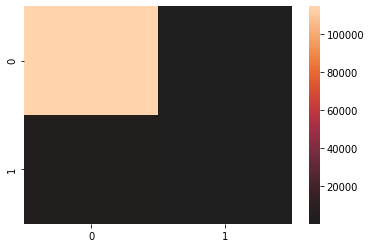

In [30]:
import matplotlib.pyplot as plt

sns.heatmap(cm, center=True)
plt.show()